# Group 5 
# Group Project: Creating Visualization: The Good, the Bad, and the Ugly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 10_000)
pd.set_option('display.width', 0)  # auto-detects available width
plt.style.use('seaborn-v0_8') # had to switch from 'seaborn' to 'seaborn-v0_8' due to seaborn changed style name in matplotlib update
pd.set_option('display.max_columns', 500) # used set_option to show all columns and at maximum of 500 columns
pd.set_option('display.max_rows', None) #wanting to show all rows for data
%matplotlib inline

### Loading the dataset

In [2]:
df_test = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\cleaned\cleaned_test.csv")
df_train = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\cleaned\cleaned_train.csv")

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
 9   family_size  418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [6]:
df_test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
413,1305,3,male,29.5,0,0,8.0500,S,Mr,1
414,1306,1,female,39.0,0,0,108.9000,C,Other,1
415,1307,3,male,38.5,0,0,7.2500,S,Mr,1
416,1308,3,male,29.5,0,0,8.0500,S,Mr,1
417,1309,3,male,30.5,1,1,22.3583,C,Master,3


## Adding survived from gender_submission.csv back to df_test

In [7]:
df_gender = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\gender_submission.csv")

In [8]:
display(df_gender.head())
display(df_test.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1
3,895,3,male,27.0,0,0,8.6625,S,Mr,1
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3


In [9]:
df_test_joined = df_test.merge(df_gender, on='PassengerId', how='left')
display(df_test_joined.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size,Survived
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,0
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,1
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,0
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,0
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,1


In [10]:
df_test_joined.insert(1, 'Survived', df_test_joined.pop('Survived'))
display(df_test_joined.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,0,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,1,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,0,2,male,62.0,0,0,9.6875,Q,Mr,1
3,895,0,3,male,27.0,0,0,8.6625,S,Mr,1
4,896,1,3,female,22.0,1,1,12.2875,S,Mrs,3


### Encoding Sex and Title

In [11]:
df_test_joined['Sex'] = df_test_joined['Sex'].map({'male': 0, 'female': 1})
df_test_joined.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,0,3,0,34.5,0,0,7.8292,Q,Mr,1
1,893,1,3,1,47.0,1,0,7.0000,S,Mrs,2
2,894,0,2,0,62.0,0,0,9.6875,Q,Mr,1
3,895,0,3,0,27.0,0,0,8.6625,S,Mr,1
4,896,1,3,1,22.0,1,1,12.2875,S,Mrs,3


In [12]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,0,35.0,0,0,8.0500,S,Mr,1


### Dummy Variables for Embarkation and Title

In [13]:
display(df_train['Title'].value_counts())
display(df_test_joined['Title'].value_counts())

Title
Mr        518
Miss      183
Mrs       125
Master     40
Other      12
Dr          7
Rev         6
Name: count, dtype: int64

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       3
Rev         2
Dr          1
Name: count, dtype: int64

In [14]:
df_train_processed = pd.get_dummies(df_train, columns=['Embarked'], drop_first= False)
df_test_joined_processed = pd.get_dummies(df_test_joined, columns=['Embarked'], drop_first=False)

In [15]:
display(df_train.head())
display(df_test_joined.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,0,35.0,0,0,8.0500,S,Mr,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,0,3,0,34.5,0,0,7.8292,Q,Mr,1
1,893,1,3,1,47.0,1,0,7.0000,S,Mrs,2
2,894,0,2,0,62.0,0,0,9.6875,Q,Mr,1
3,895,0,3,0,27.0,0,0,8.6625,S,Mr,1
4,896,1,3,1,22.0,1,1,12.2875,S,Mrs,3


In [16]:
df_train_processed = pd.get_dummies(df_train_processed, columns=['Title'], drop_first=False)
df_test_joined_processed = pd.get_dummies(df_test_joined_processed, columns=['Title'], drop_first=False)

In [17]:
display(df_test_joined_processed.head())
display(df_train_processed.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,892,0,3,0,34.5,0,0,7.8292,1,False,True,False,False,False,False,True,False,False,False
1,893,1,3,1,47.0,1,0,7.0000,2,False,False,True,False,False,False,False,True,False,False
2,894,0,2,0,62.0,0,0,9.6875,1,False,True,False,False,False,False,True,False,False,False
3,895,0,3,0,27.0,0,0,8.6625,1,False,False,True,False,False,False,True,False,False,False
4,896,1,3,1,22.0,1,1,12.2875,3,False,False,True,False,False,False,False,True,False,False


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,1,0,3,0,22.0,1,0,7.2500,2,False,False,True,False,False,False,True,False,False,False
1,2,1,1,1,38.0,1,0,71.2833,2,True,False,False,False,False,False,False,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,1,False,False,True,False,False,True,False,False,False,False
3,4,1,1,1,35.0,1,0,53.1000,2,False,False,True,False,False,False,False,True,False,False
4,5,0,3,0,35.0,0,0,8.0500,1,False,False,True,False,False,False,True,False,False,False


## Decision Tree  

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X_train = df_train_processed.drop(columns=['Survived', 'PassengerId'])
y_train = df_train_processed['Survived']
X_test = df_test_joined_processed.drop(columns=['Survived', 'PassengerId'])
y_test = df_test_joined_processed['Survived']

In [20]:
dt = DecisionTreeClassifier(random_state=6500)
dt.fit(X_train, y_train)
print("Training Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Training Accuracy: 0.9842873176206509
Testing Accuracy: 0.777511961722488


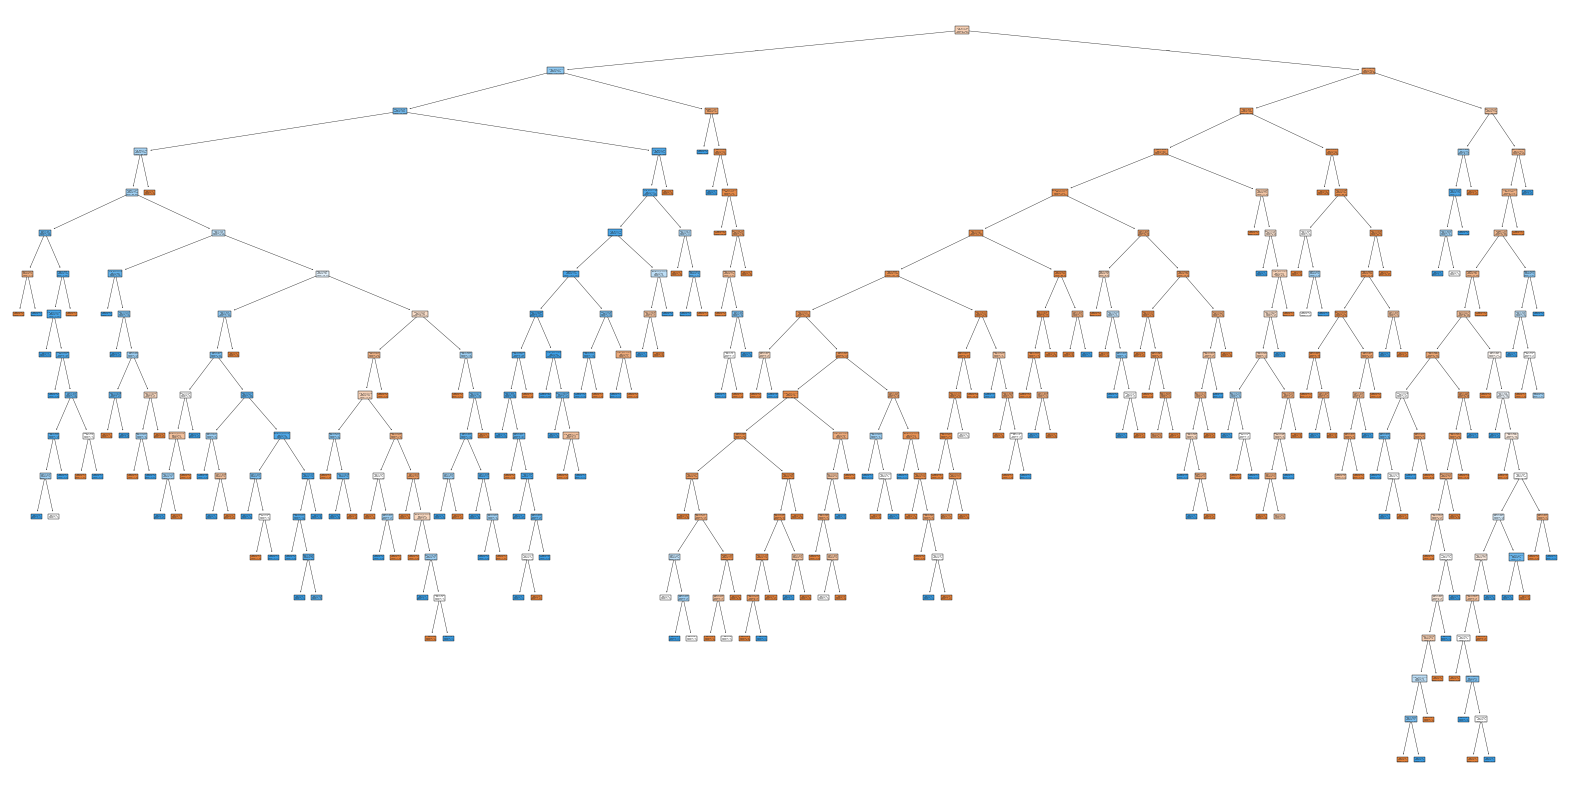

In [21]:
figure = plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True)
plt.show()

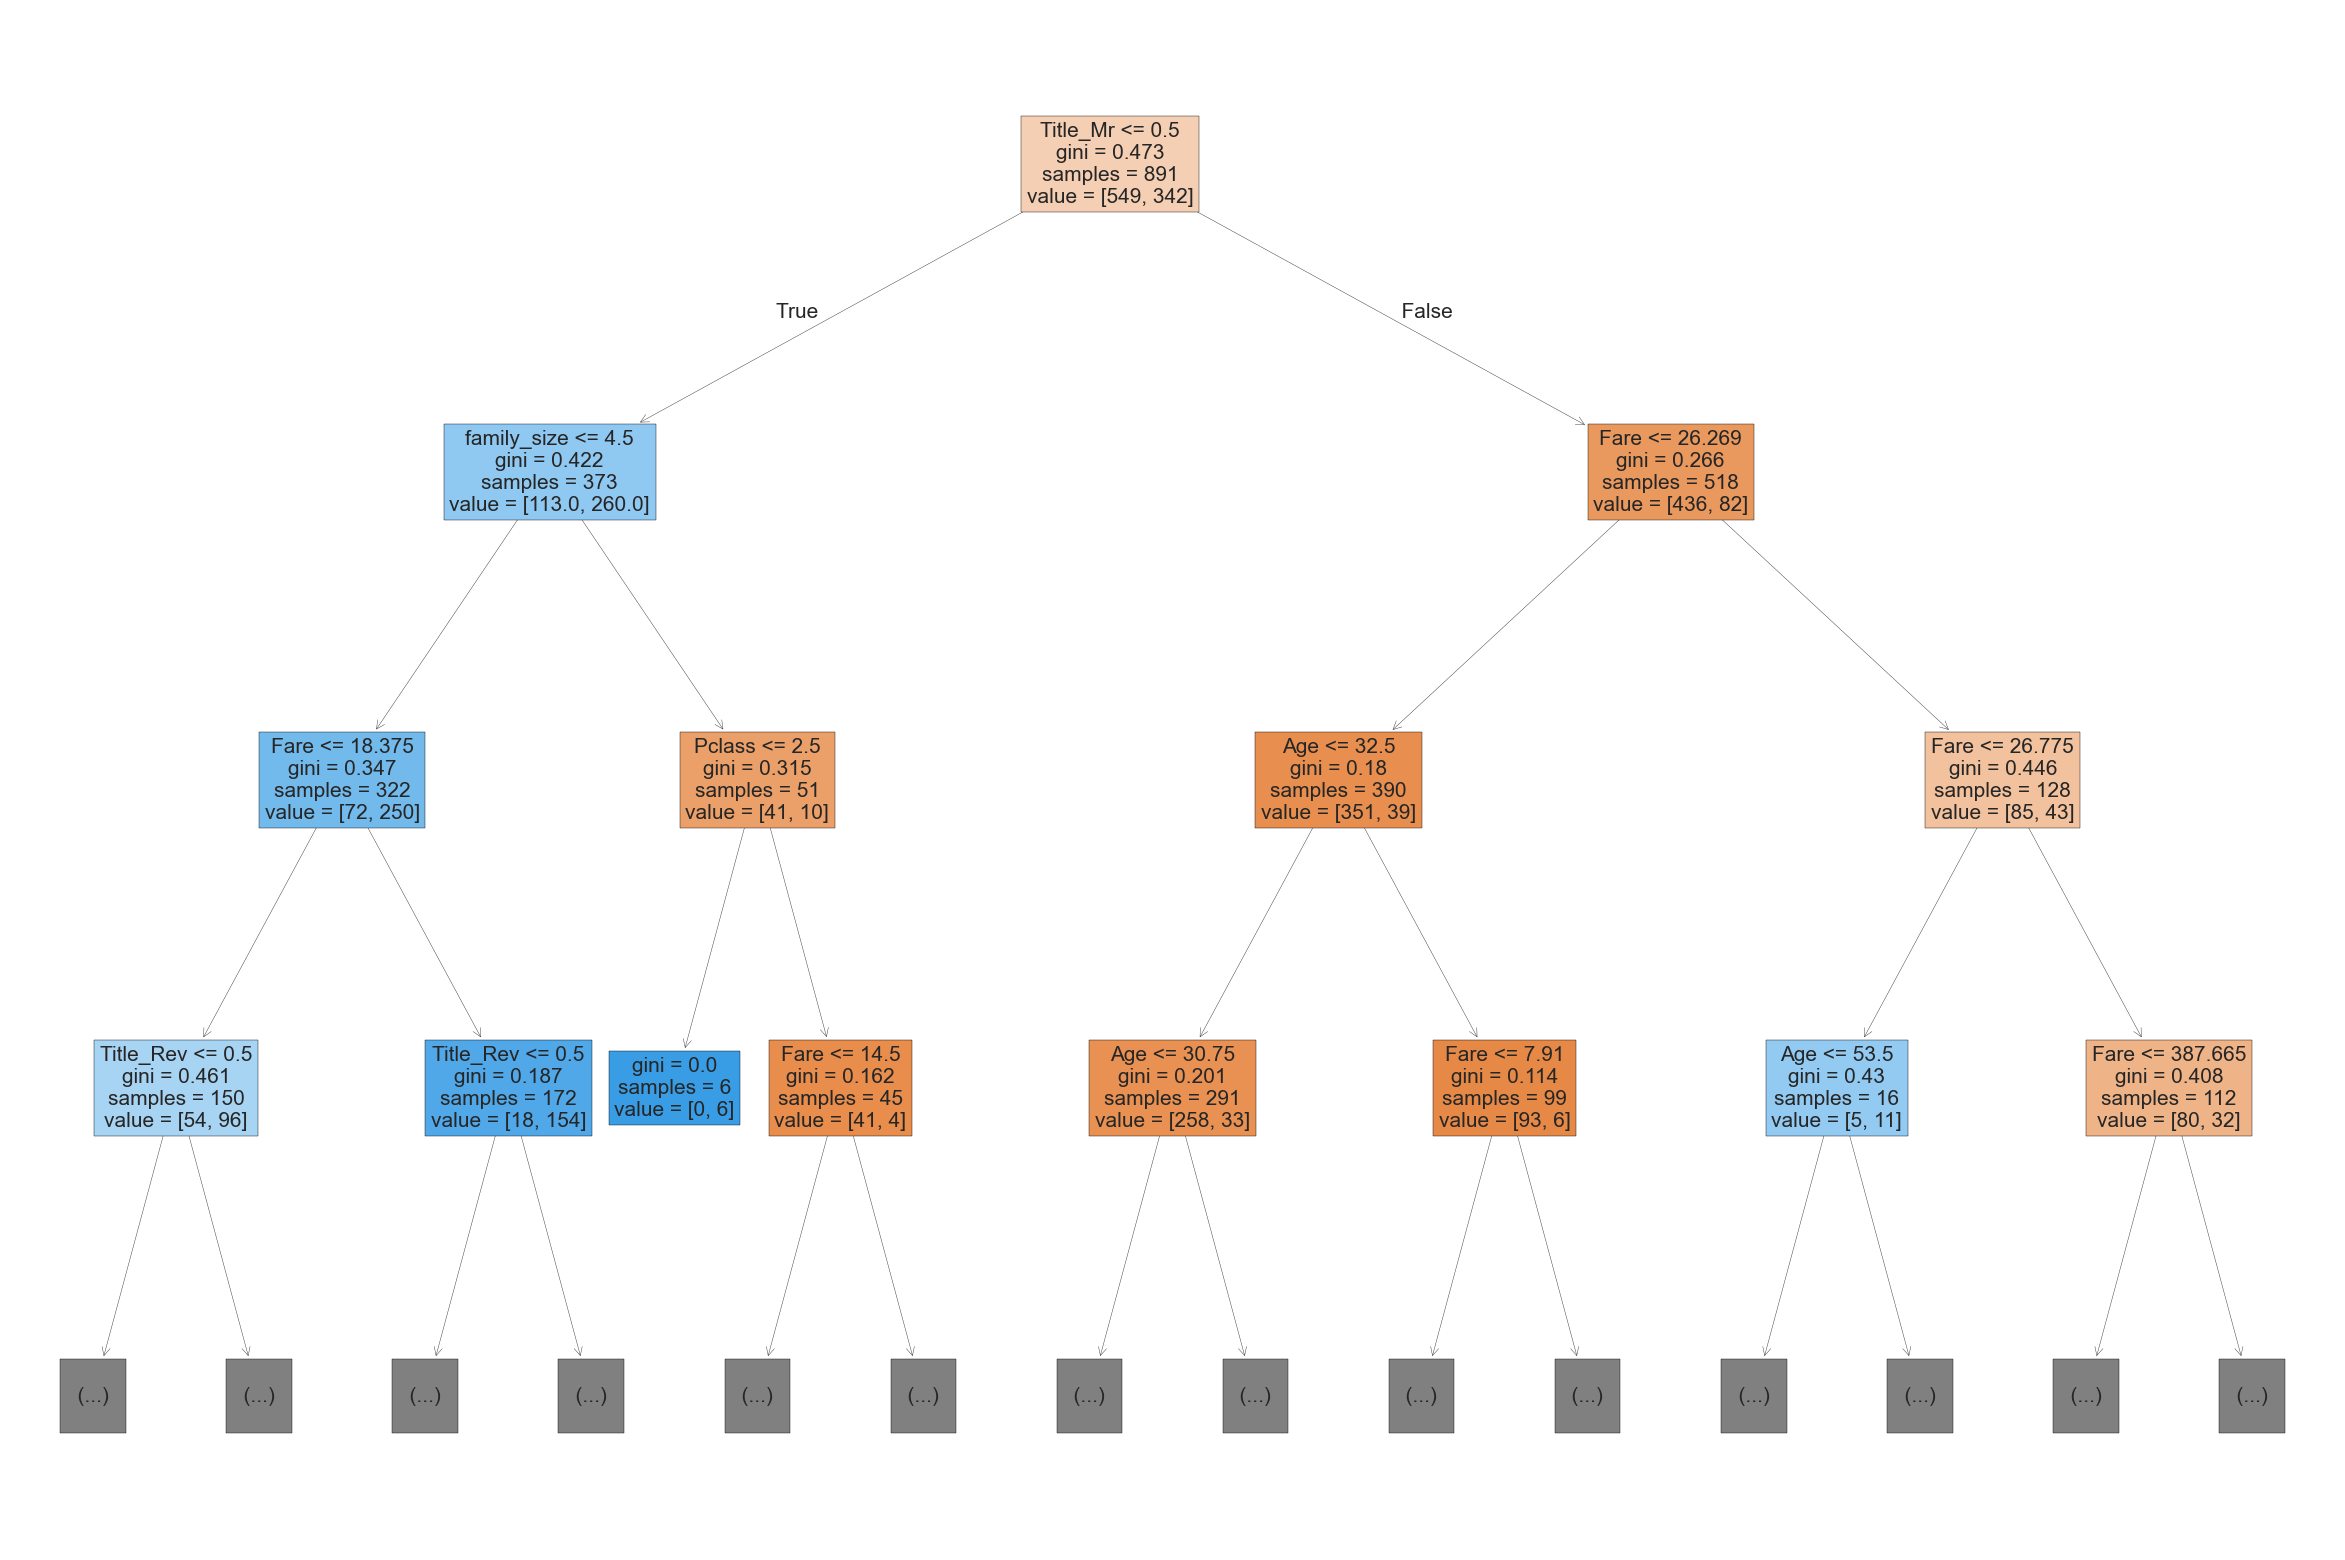

In [38]:
figure = plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_train.columns,filled=True, fontsize=15,max_depth=3)
plt.show()

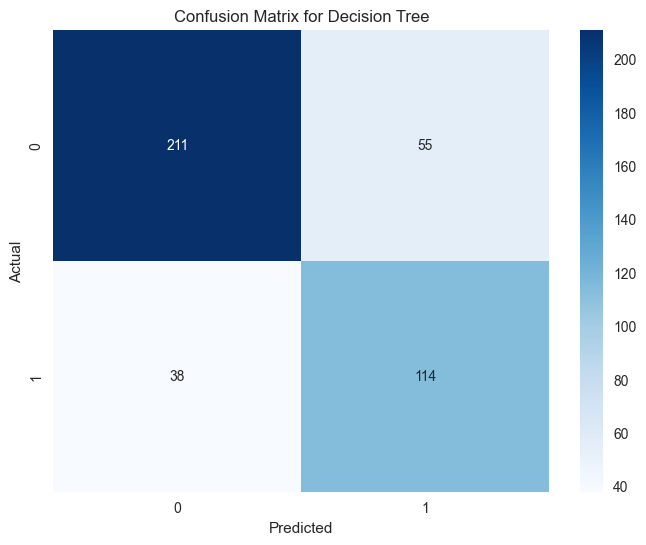

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

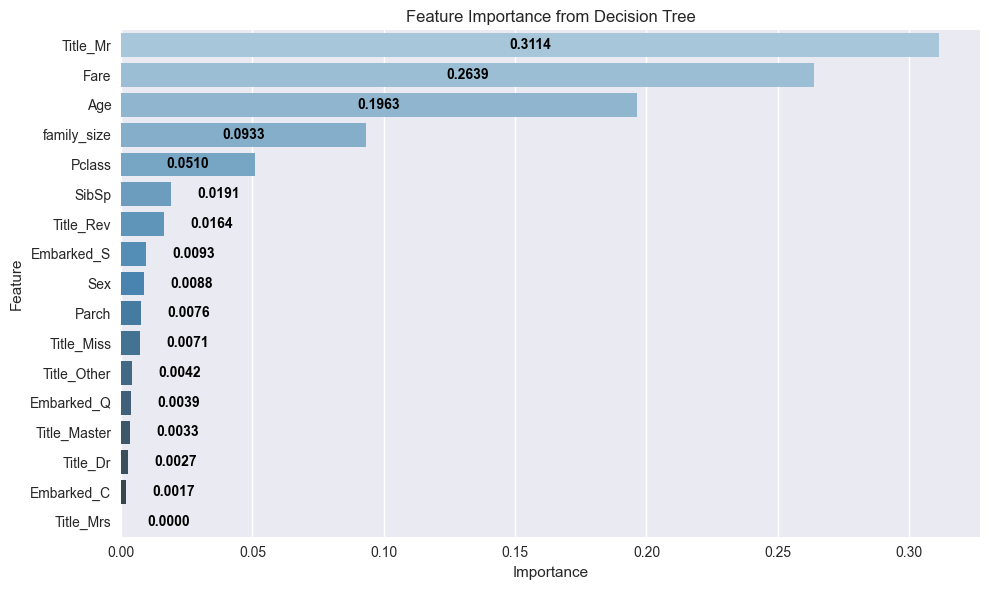


Feature Importance Rankings:
     Feature  Importance
    Title_Mr    0.311407
        Fare    0.263902
         Age    0.196282
 family_size    0.093287
      Pclass    0.051012
       SibSp    0.019139
   Title_Rev    0.016354
  Embarked_S    0.009318
         Sex    0.008813
       Parch    0.007628
  Title_Miss    0.007050
 Title_Other    0.004227
  Embarked_Q    0.003855
Title_Master    0.003298
    Title_Dr    0.002690
  Embarked_C    0.001739
   Title_Mrs    0.000000


In [24]:

feature_importance = pd.DataFrame({'Feature': X_train.columns,'Importance': dt.feature_importances_}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='Blues_d')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')

# adding importance values inside or at the end of bars
max_importance = feature_importance['Importance'].max()
for i, (value, feature) in enumerate(zip(feature_importance['Importance'], feature_importance['Feature'])):
    # If bar is too small (less than 15% of max), place text at the end
    if value < 0.15 * max_importance:
        ax.text(value + 0.01, i, f'{value:.4f}', ha='left', va='center', color='black', fontweight='bold')
    else:
        ax.text(value/2, i, f'{value:.4f}', ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
print(feature_importance.to_string(index=False))

### Combining both df_train and df_test_joined for more analysis and visualizations

In [25]:
df_joined = pd.concat([df_train, df_test_joined], ignore_index=True)
df_joined.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,0,35.0,0,0,8.0500,S,Mr,1


In [26]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   Title        1309 non-null   object 
 10  family_size  1309 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 112.6+ KB


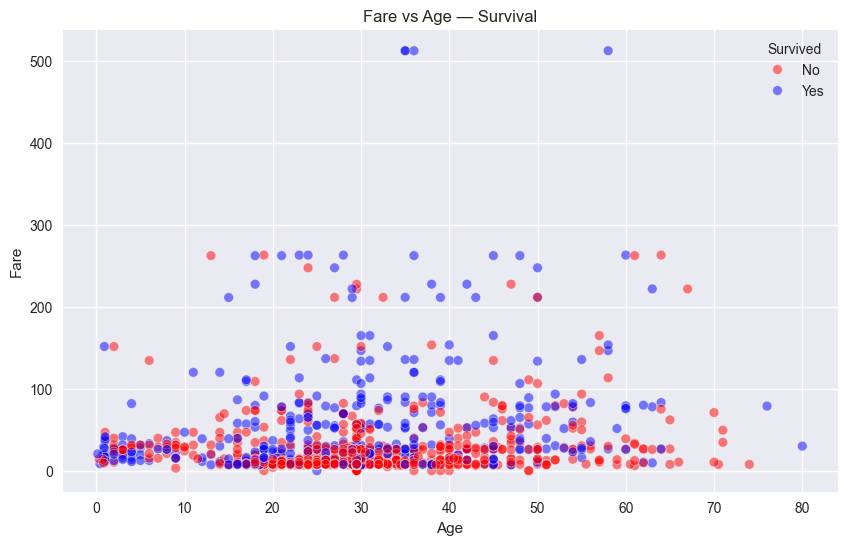

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_joined, y="Fare", x="Age", hue="Survived", palette={0:'r', 1:'b'}, alpha=0.5)
plt.title("Fare vs Age — Survival")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No', 'Yes'], title='Survived')
plt.show()


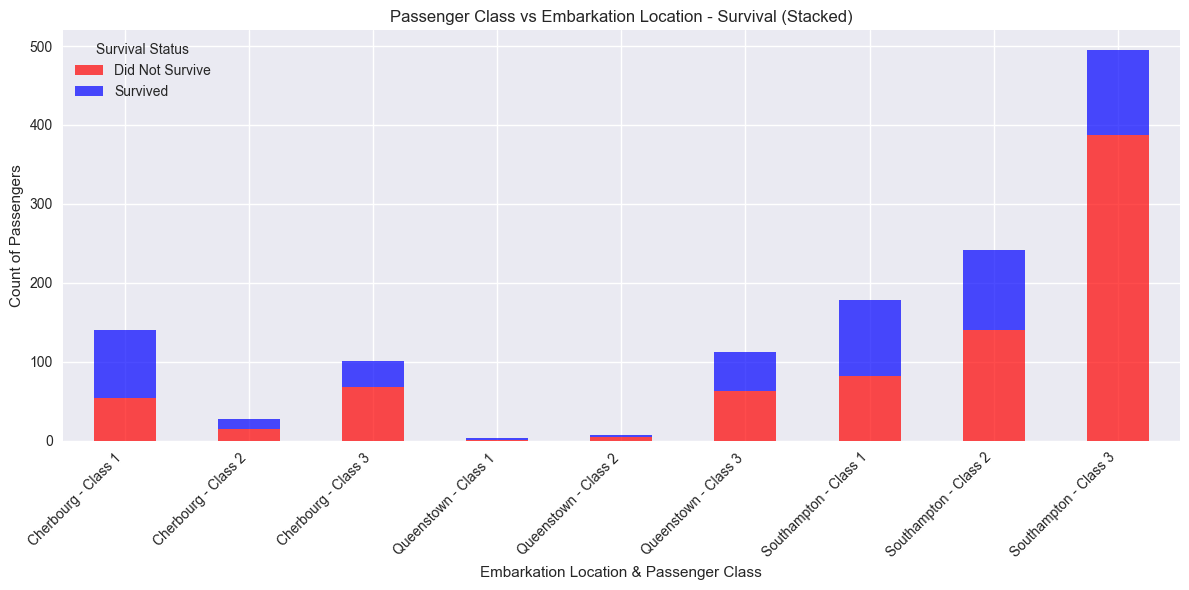

In [58]:
plt.figure(figsize=(12, 6))
stacked_data = df_joined.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(fill_value=0)

location_names = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
x_labels = [f"{location_names[loc]} - Class {pclass}" for loc, pclass in stacked_data.index]

stacked_data.plot(kind='bar', stacked=True, color=['red', 'blue'], alpha=0.7, ax=plt.gca())
plt.title("Passenger Class vs Embarkation Location - Survival (Stacked)")
plt.xlabel("Embarkation Location & Passenger Class")
plt.ylabel("Count of Passengers")
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Did Not Survive', 'Survived'], title='Survival Status', fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


### Misleading Pie Chart: Survival Rate by Fare Range

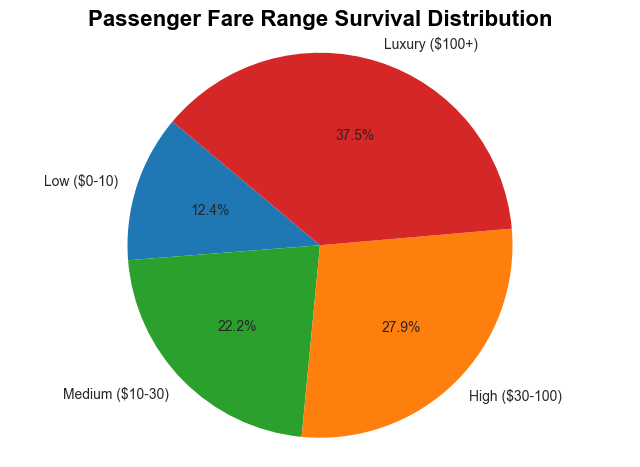

In [73]:
# Create fare bins and calculate survival rates
df_joined['Fare_Category'] = pd.cut(df_joined['Fare'], bins=[0, 10, 30, 100, 600], 
                                     labels=['Low ($0-10)', 'Medium ($10-30)', 'High ($30-100)', 'Luxury ($100+)'])
survival_by_fare = df_joined.groupby('Fare_Category')['Survived'].mean() * 100

plt.pie(survival_by_fare, 
        labels=survival_by_fare.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])

plt.title("Passenger Fare Range Survival Distribution", fontsize=16, weight='bold', color='black')
plt.axis('equal')
plt.show()